In [68]:
%matplotlib inline 

###########
#PDF PROCESSING FOR various INPUT 
# DEPENDING ON THE PDF_PROCESSING CLASS
#by Carl Schleussner, Peter Pfleiderer Climate Analytics
#carl.schleussner@climateanalytics.org
###########

# IMPORT AND CONFIG 
import numpy as np
import netCDF4 as net
import dimarray as da 
import sys,glob,datetime,pickle,os,itertools
import pandas as pd
import matplotlib.pylab as plt 
from netCDF4 import Dataset,netcdftime,num2date

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8,6
from matplotlib import rc
rc('text', usetex=True)

#os.chdir('/Users/peterpfleiderer/Documents/Projects/0p5_observed/pdf_processing/')
try:
    import pdf_processing as pdf; reload(pdf)
except ImportError:
    raise ImportError(
        "cannot find PDF_Processing code")

###########
# Settings
###########

# PDF Method (currently defined: hist, python_silverman)
pdf_method='python_silverman'

# variables
varin='TXx'
# Cut Interval range for variable
cut_interval_dict={'TXx':[-2,3]}

varin_dict={
    'TXx':{'var_name':'TXX','longname':'Hot extremes (TXx)','unit':'TXx [$^\circ$ C]'},
    'TNn':{'var_name':'TNN','longname':'Cold extremes (TNn)','unit':'TNn [$^\circ$ C]'},
    'WSDI':{'var_name':'WSDI','longname':'Warm-spell duration (WSDI)','unit':'WSDI [days]'},
    'RX5':{'var_name' :'Rx5day','longname':'5-day heavy rainfall (Rx5day)','unit':'RX5 [$\%$]'},
    'RX1':{'var_name':'Rx1day','longname':'Daily heavy rainfall (Rx1day)', 'unit':'RX1 [$\%$]'}}


# time informations and periods
timeaxis=np.arange(1958,2011)
ref_period=[1960,1979]
target_periods=[[1986,2005],[1991,2010],ref_period]
period_names=['IPCC_ref','Recent','ref']

# Set range for years for bootstrap sampling 
bs_range=[1958,2010]

# Input datasets
dataset='HadEX2'

# Set plottint colours
colord= "#247a9c"


In [69]:
##############
# Read_in_and_process_data
##############

read_in_data=da.read_nc('../../data/data_climdex/HadEx2/H2_'+varin+'_1901-2010_RegularGrid_global_3.75x2.5deg_LSmask.nc')['Ann']
input_data=da.DimArray(read_in_data[19580101:20100101,:,:], axes=[timeaxis, read_in_data.lat, read_in_data.lon],dims=['year', 'lat', 'lon'] )

# mask Greenland [only for observational data]
landmask=input_data.ix[10,:,:].copy()
landmask[:,:]=1
GRL_mask=Dataset('support/GRL_73x96_lat_weighted.nc4').variables['GRL'][:,:]

# Mask for data availability (individual for each dataset)
pdf_processed=pdf.PDF_Processing(varin)
pdf_processed.mask_for_ref_period_data_coverage(input_data,ref_period,check_ref_period_only=False,target_periods=target_periods,landmask=landmask,required_coverage=0.8,dataset=dataset)




support/73x96_HadEX2_TXx_masks.pkl
mask exists and is not overwriten


IPCC_ref [1986, 2005]
Recent [1991, 2010]
ref [1960, 1979]
Warning, NaNs in difference kernel estimation. No of NaNs: 0
Warning, NaNs in difference kernel estimation. No of NaNs: 0


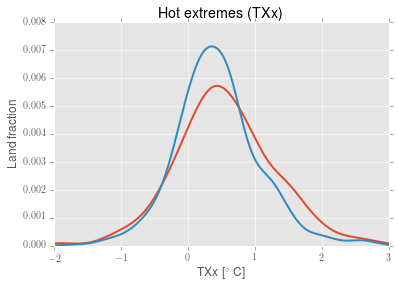

In [70]:
###############
# Derive PDFs and plot
###############
pdf_processed.derive_time_slices(ref_period,target_periods,period_names)
pdf_processed.derive_distributions()
pdf_processed.derive_pdf_difference('ref','Recent',pdf_method=pdf_method,bin_range=cut_interval_dict[varin])
pdf_processed.derive_pdf_difference('ref','IPCC_ref',pdf_method=pdf_method,bin_range=cut_interval_dict[varin])


region='global'
distro='pdf'

f,pl=plt.subplots(nrows=1,ncols=1,figsize=(6,4))
# pplot=pl.flatten()

pl.plot(pdf_processed._distributions[region][distro]['xaxis'],
              pdf_processed._distributions[region][distro]['Recent_ref'],
              label='Recent',
              linewidth=2)
pl.plot(pdf_processed._distributions[region][distro]['xaxis'],
              pdf_processed._distributions[region][distro]['IPCC_ref_ref'],
              label='IPCC_ref',
              linewidth=2)
            
pl.set_title(varin_dict[varin]['longname'])
pl.set_xlabel(varin_dict[varin]['unit'])
pl.set_ylabel('Land fraction')
plt.show()



In [71]:
##############
# Derive KS-test 
##############

ks=pdf_processed.ks_test('IPCC_ref','Recent',region='global')


Distributions for IPCC_ref and Recent are significantly different at the 95.0 % level following a two-tailed Kolmogorov-Smirnoff test


In [72]:
##############
# Running window KS-test
##############

for startyear in xrange(1951,1992):    
    target_periods=[[startyear,startyear+19],[1991,2010],ref_period]
    pname=str(startyear)+'_'+str(startyear+19)
    period_names=[pname,'Recent','ref']
    pdf_processed.derive_time_slices(ref_period,target_periods,period_names)
    pdf_processed.derive_distributions()
    ks=pdf_processed.ks_test(pname,'Recent',region='global')




1951_1970 [1951, 1970]
Recent [1991, 2010]
ref [1960, 1979]
Distributions for 1951_1970 and Recent are significantly different at the 95.0 % level following a two-tailed Kolmogorov-Smirnoff test
1952_1971 [1952, 1971]
Recent [1991, 2010]
ref [1960, 1979]
Distributions for 1952_1971 and Recent are significantly different at the 95.0 % level following a two-tailed Kolmogorov-Smirnoff test
1953_1972 [1953, 1972]
Recent [1991, 2010]
ref [1960, 1979]
Distributions for 1953_1972 and Recent are significantly different at the 95.0 % level following a two-tailed Kolmogorov-Smirnoff test
1954_1973 [1954, 1973]
Recent [1991, 2010]
ref [1960, 1979]
Distributions for 1954_1973 and Recent are significantly different at the 95.0 % level following a two-tailed Kolmogorov-Smirnoff test
1955_1974 [1955, 1974]
Recent [1991, 2010]
ref [1960, 1979]
Distributions for 1955_1974 and Recent are significantly different at the 95.0 % level following a two-tailed Kolmogorov-Smirnoff test
1956_1975 [1956, 1975]
Re